In [27]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [31]:
model_pt = YOLO('best.pt').to('mps')
model_ml = YOLO('best.mlpackage', task='segment')

In [36]:
img = 'test3.jpg'
res_pt = model_pt.predict(img, conf=0.3)
res_ml = model_ml.predict(img, conf=0.3)


image 1/1 /Users/uzbtrust/Desktop/Nutrient calculator/test3.jpg: 384x640 4 foods, 27.6ms
Speed: 6.7ms preprocess, 27.6ms inference, 20.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/uzbtrust/Desktop/Nutrient calculator/test3.jpg: 640x640 5 foods, 30.4ms
Speed: 0.9ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


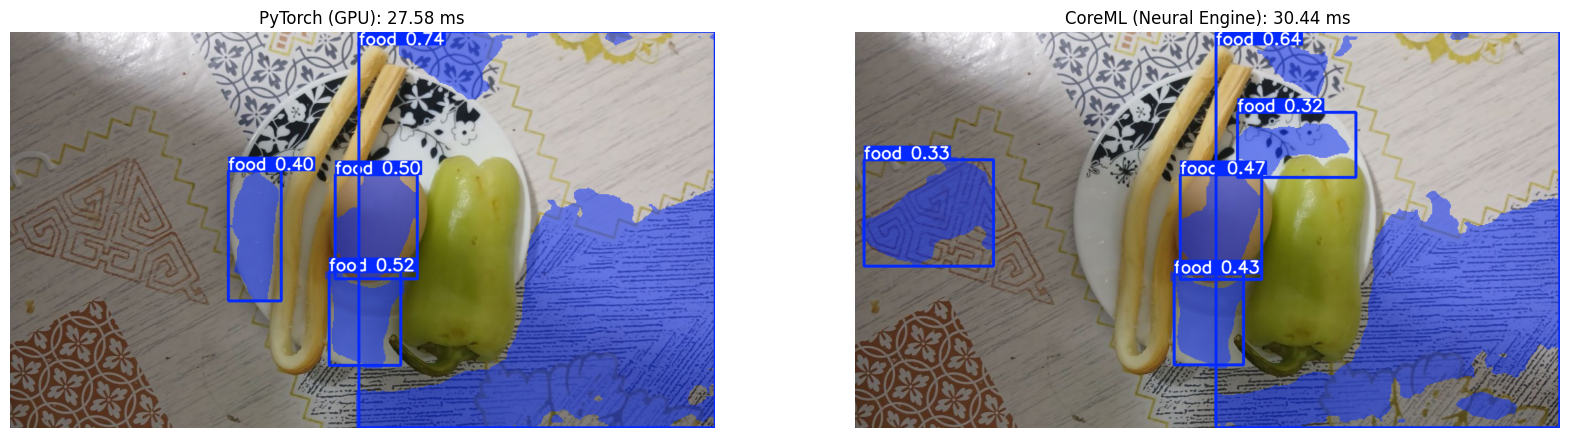

In [37]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(res_pt[0].plot()[:,:,::-1])
plt.title(f"PyTorch (GPU): {res_pt[0].speed['inference']:.2f} ms")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res_ml[0].plot()[:,:,::-1])
plt.title(f"CoreML (Neural Engine): {res_ml[0].speed['inference']:.2f} ms")
plt.axis('off')

plt.show()